In [1]:
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import math 
style.use('ggplot')

In [2]:
def hypothesis(x,w,j):
    h = w[0]
    X=np.ones((len(w), len(x)))
    for i in np.arange(1, len(w)):                
        X[i] = x ** (i)
    X=np.transpose(X)
    h= X@w
    return h

In [3]:
#errors
def error(X, y, w, i, j):
    if(i==0): #mean_square_error
        y1 = hypothesis(X,w,j)
        return sum((y1-y)**2)/(y.size)
    elif i==1: #mean_absolute_error
        y1 = hypothesis(X,w,j)
        return sum(abs(y1-y))/(y.size)
    elif i==2: #log_cosh_loss
        y1 = hypothesis(X,w,j)
        return np.sum(np.log(np.cosh(y1-y)))/(y.size)
    elif i==3: #root_mean_square_error
        y1 = hypothesis(X,w,j)
        return np.sqrt(sum((y1-y)**2)/(y.size))
    elif i==4: #log loss
        y1 = hypothesis(X,w,j)
        return sum(np.log(1/np.abs(y1-y))/(y.size))
    elif i==5: #KLDivergence
        y1 = hypothesis(X,w,j)
        return np.sum(y1 *( np.log(abs(y1))-np.log(abs(y))))/y.size

In [4]:
#gradient functions
def grad(X, y, h, err):
    n=y.size
    if err==0:
        return (2/n)*np.dot(np.transpose(X), h-y)
    elif err==1:
        return (1/n)*np.dot(np.transpose(X),np.sign(h-y))    
    elif err==2:
        return (1/n)*np.dot(np.transpose(X), np.tanh(h-y))
    elif err==3:
        return np.dot(np.transpose(X), h-y)/(np.sqrt(sum((h-y)**2))*n)
    elif err==4:
        return (-1/n)*np.dot((np.transpose(X),np.transpose(np.linalg.pinv(h-y))))
    elif err==5:
        return np.add(np.dot(np.transpose(X),np.log(np.abs(h/y))) , np.dot(np.transpose(X),y))

In [5]:
#basis functions
def basis(x,i):
    if(i==0):
        return x
    elif(i==1):
        #gaussian
        return np.exp(-(x**2)/2)
    elif(i==2):
        #sigmoid
        return 1/(1+np.exp(-x))
    elif(i==3):
        #tanh
        return (1-np.exp(-x))/(1+np.exp(-x))

In [6]:
#noise variance
def noise(x,w,y):
    return error(x, y, w, 0, 0)

In [13]:
def mini_batch_maker(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y.reshape(len(y),-1)))
    np.random.shuffle(data)
    i = 0
    for i in range(0, (math.floor(data.shape[0]/batch_size)) ):
        mini_batch = data[i * batch_size:(i + 1)*batch_size , :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def gradient_descent(x, y,X_test,Y_test, order=5, batch_size=20, err=1, basis=0, tol = 10**-5, numIters = 1000, learningRate = 0.0001):
    n = len(x)
    w = np.zeros((order + 1,1))           
    costs = []
    minicosts= []
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    for i in range(numIters):
        mini_batches = mini_batch_maker(X, y, batch_size)
        minicosts=[]
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            h = hypothesis(X_mini[:,1], w, 0)
            w += -learningRate * grad(X_mini, y_mini, h, err)
            cost =error(X_mini[:,1], y_mini, w, err , 0)
            minicosts.append(cost)
        costs.append(sum(minicosts))
    plt.figure(1)
    plt.scatter(x,y,c='b')
    plt.scatter(X_test,Y_test,c='r')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i) ) 
    label = ''.join(labelr)
    print(label)
    print('For mini-batch size: '+ str(batch_size))
    func= hypothesis(x,w,0)
    plt.plot(x, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    
    plt.figure(2)
    plt.plot(costs)
    plt.xlabel('Iterations')
    plt.ylabel('cost')
    plt.title('Cost vs Iterations of Gradient Descent')
    
    plt.show()
    W = []
    for i in range(0,len(w)):
        W = W.append(w[i][0])
    w = W
    print(w)
    return w

In [14]:
def main_f(order,what,size, batch_size=5, numIters = 1000,tol = 10**-5, learningRate = 0.001, err = 0):
    if(err==0):
        print('mean_square_error')
    elif err==1:
        print('mean_absolute_error')
    elif err==2: 
        print('log_cosh_loss')
    elif err==3: 
        print('root_mean_square_error')
    elif err==4: 
        print('log loss')
    elif err==5: 
        print('KLDivergence')
        
    if(what==0):
        print('Calculating w by psuedo_inverse')
    elif what==1:
        print('Calculating w by gradient descent')
        
    print('Polynomial Order:' + str(order))
    
    data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")
    global X
    global Y
    X = data_set.iloc[:size,0].values
    Y = data_set.iloc[:size,1].values
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(0,20):
        if i%5 == 0:
            X_test.append(data_set.iloc[i,0])
            Y_test.append(data_set.iloc[i,1])
        else:
            X_train.append(data_set.iloc[i,0])
            Y_train.append(data_set.iloc[i,1])  
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    if what == 0:
        return perf_on_test(X_train, Y_train, X_test, Y_test,order)     
    else:
        w = gradient_descent(X_train, Y_train, X_test, Y_test, order,batch_size, err, 0, tol, numIters, learningRate)
        cost_train= error(X_train, Y_train, w,err,0)
        print('Training Cost: ' + str(cost_train))
        cost_test= error(X_test, Y_test, w, err,0)
        print('Testing Cost: ' + str(cost_test))
        noisee = noise(X,w,Y)
        print('Noise: ' + str(noisee))

mean_absolute_error
Calculating w by gradient descent
Polynomial Order:1
-197.33 + 886.43x^1
For mini-batch size: 5


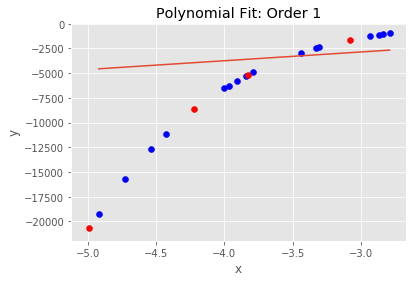

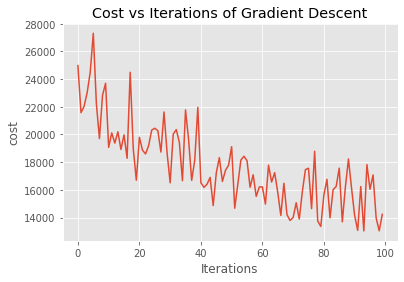

AttributeError: 'NoneType' object has no attribute 'append'

In [15]:
main_f(1,1,20,5,100,10**-5, 1,1)

mean_absolute_error
Calculating w by gradient descent
Polynomial Order:1
-0.00 + 0.00x^1
For mini-batch size: 5


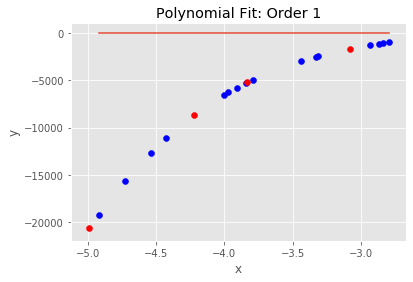

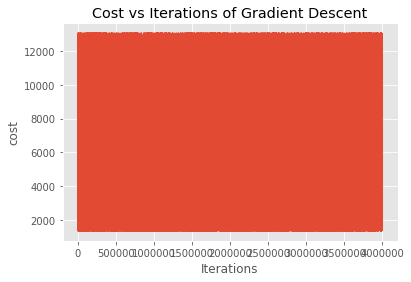

Training Cost: [19220.81404233 15663.50404233 12652.05404233 11133.38404233
  6526.05404233  6273.23404233  5790.44404233  5265.97404233
  4915.04404233  2946.80404233  2480.11404233  2402.40404233
  1251.53404233  1121.27404233  1058.59404233   962.26404233]
Testing Cost: [20683.05359131  8638.12359131  5194.18359131  1635.69359131]
Noise: [4.27788721e+08 3.69439689e+08 2.45345356e+08 1.60074469e+08
 1.23952238e+08 7.46171854e+07 4.25893802e+07 3.93534642e+07
 3.35292412e+07 2.77304817e+07 2.69795469e+07 2.41576571e+07
 8.68365353e+06 6.15096522e+06 5.77154475e+06 2.67549471e+06
 1.56633723e+06 1.25725528e+06 1.12062116e+06 9.25951914e+05]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:2
-0.00 + 0.00x^1 + -0.01x^2
For mini-batch size: 5


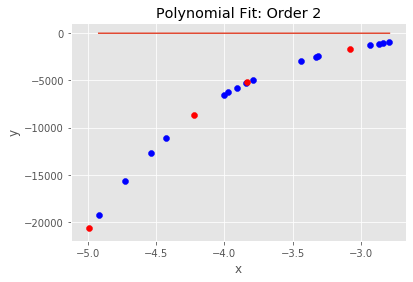

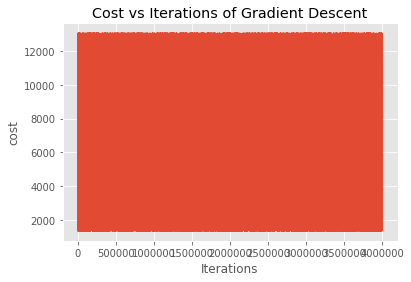

Training Cost: [19220.73172643 15663.42172643 12651.97172643 11133.30172643
  6525.97172643  6273.15172643  5790.36172643  5265.89172643
  4914.96172643  2946.72172643  2480.03172643  2402.32172643
  1251.45172643  1121.19172643  1058.51172643   962.18172643]
Testing Cost: [20682.95767211  8638.02767211  5194.08767211  1635.59767211]
Noise: [4.27785203e+08 3.69436420e+08 2.45342692e+08 1.60072317e+08
 1.23950345e+08 7.46157163e+07 4.25882703e+07 3.93523973e+07
 3.35282564e+07 2.77295861e+07 2.69786635e+07 2.41568211e+07
 8.68315237e+06 6.15054342e+06 5.77113617e+06 2.67521653e+06
 1.56612439e+06 1.25706459e+06 1.12044113e+06 9.25788267e+05]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:3
-0.00 + 0.00x^1 + -0.01x^2 + 0.02x^3
For mini-batch size: 5


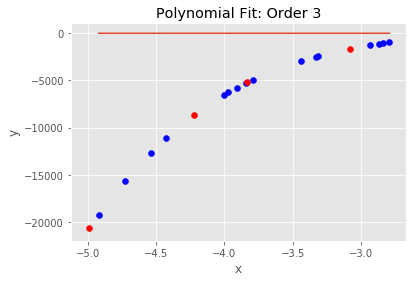

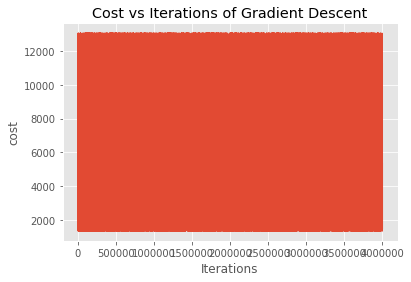

Training Cost: [19219.4373584 15662.1273584 12650.6773584 11132.0073584  6524.6773584
  6271.8573584  5789.0673584  5264.5973584  4913.6673584  2945.4273584
  2478.7373584  2401.0273584  1250.1573584  1119.8973584  1057.2173584
   960.8873584]
Testing Cost: [20681.33756289  8636.40756289  5192.46756289  1633.97756289]
Noise: [4.27728968e+08 3.69384161e+08 2.45300105e+08 1.60037919e+08
 1.23920075e+08 7.45922316e+07 4.25705284e+07 3.93353428e+07
 3.35125146e+07 2.77152704e+07 2.69645430e+07 2.41434596e+07
 8.67514255e+06 6.14380255e+06 5.76460659e+06 2.67077165e+06
 1.56272406e+06 1.25401844e+06 1.11756541e+06 9.23174473e+05]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:4
-0.00 + 0.00x^1 + -0.01x^2 + 0.02x^3 + -0.09x^4
For mini-batch size: 5


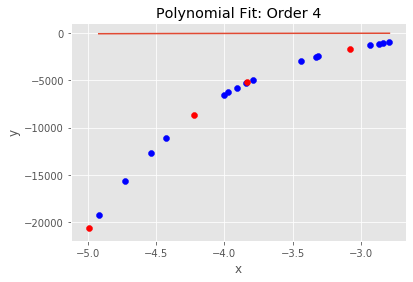

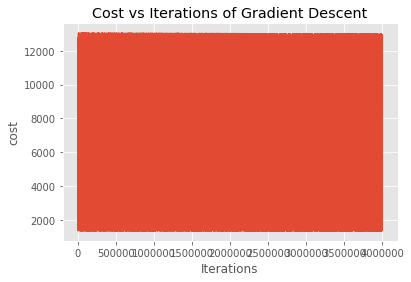

Training Cost: [19197.94434803 15640.63434803 12629.18434803 11110.51434803
  6503.18434803  6250.36434803  5767.57434803  5243.10434803
  4892.17434803  2923.93434803  2457.24434803  2379.53434803
  1228.66434803  1098.40434803  1035.72434803   939.39434803]
Testing Cost: [20652.53822177  8607.60822177  5163.66822177  1605.17822177]
Noise: [4.26780303e+08 3.68502625e+08 2.44581880e+08 1.59457945e+08
 1.23409822e+08 7.41965317e+07 4.22717906e+07 3.90482116e+07
 3.32475476e+07 2.74743810e+07 2.67269495e+07 2.39186810e+07
 8.54072295e+06 6.03080801e+06 5.65517961e+06 2.59654322e+06
 1.50613186e+06 1.20340628e+06 1.06983080e+06 8.79862235e+05]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:5
-0.00 + 0.00x^1 + -0.01x^2 + 0.02x^3 + -0.09x^4 + 0.39x^5
For mini-batch size: 5


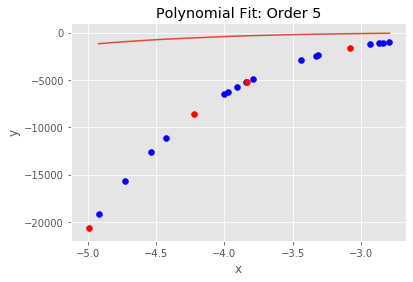

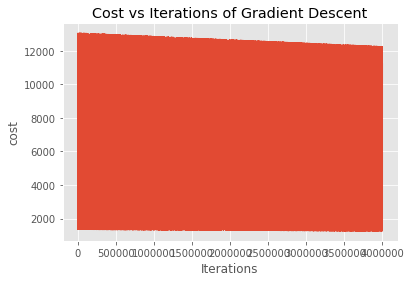

Training Cost: [18823.57660061 15266.26660061 12254.81660061 10736.14660061
  6128.81660061  5875.99660061  5393.20660061  4868.73660061
  4517.80660061  2549.56660061  2082.87660061  2005.16660061
   854.29660061   730.47035599   675.62535599   591.69304652]
Testing Cost: [20117.22604455  8072.29604455  4628.35604455  1069.86604455]
Noise: [4.10274684e+08 3.53185972e+08 2.32157724e+08 1.49482439e+08
 1.14669166e+08 6.74848051e+07 3.72774160e+07 3.42594084e+07
 2.88513073e+07 2.35045942e+07 2.28155361e+07 2.02342400e+07
 6.45668407e+06 4.32624096e+06 4.01379959e+06 1.57858527e+06
 8.00539501e+05 6.03730060e+05 5.21120517e+05 4.09479154e+05]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:6
-0.00 + 0.00x^1 + -0.01x^2 + 0.02x^3 + -0.08x^4 + 0.33x^5 + -1.37x^6
For mini-batch size: 5


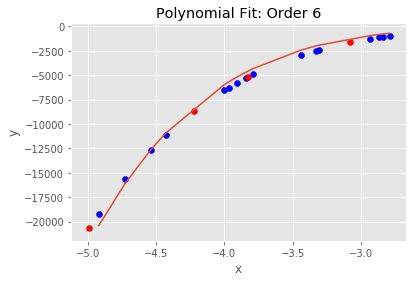

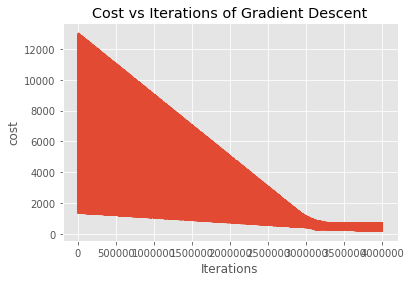

Training Cost: [13388.77086144 10336.21617249  8077.62962741  7128.46087741
  4800.10462974  4673.69462974  4453.89776654  4311.80292149
  4260.91759647  4404.4846146   4462.8208646   4476.97804351
  4945.76321938  5010.89321938  5042.23321938  5090.39821938]
Testing Cost: [12372.48640159  6350.02140159  6128.45676686  7614.81231796]
Noise: [2.39463061e+08 2.00407782e+08 1.23250929e+08 7.77150877e+07
 6.16311842e+07 4.52202275e+07 4.10604584e+07 4.11604152e+07
 4.17064399e+07 4.28278814e+07 4.30241909e+07 4.38854572e+07
 5.43817024e+07 5.80068279e+07 5.86527641e+07 6.56731884e+07
 6.96328898e+07 7.10425437e+07 7.17329505e+07 7.28093225e+07]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:7
-0.00 + 0.00x^1 + -0.00x^2 + 0.01x^3 + -0.03x^4 + 0.09x^5 + -0.21x^6 + 0.27x^7
For mini-batch size: 5


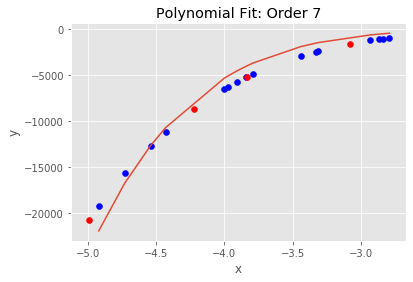

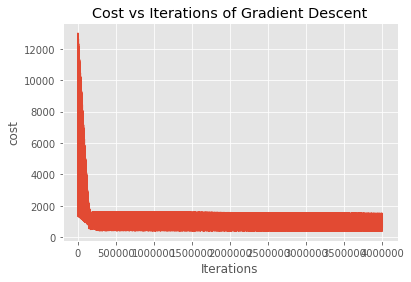

Training Cost: [13813.83089385 10835.60711747  8577.01961747  7627.84417709
  5270.34169813  5143.93169813  4902.53669813  4649.51821537
  4537.6975616   4480.85497147  4539.19122147  4548.90497147
  4840.86900699  4905.99900699  4937.33900699  4985.50400699]
Testing Cost: [13231.39317041  7208.92817041  6733.34831311  7903.05357728]
Noise: [2.52201942e+08 2.12656076e+08 1.34305731e+08 8.77595363e+07
 7.11661129e+07 5.39179864e+07 4.90496092e+07 4.90647439e+07
 4.94487906e+07 5.03942702e+07 5.05664940e+07 5.13341076e+07
 6.11700004e+07 6.46385495e+07 6.52584137e+07 7.20216037e+07
 7.58524178e+07 7.72183689e+07 7.78877464e+07 7.89317992e+07]


In [12]:
for i in range(1,8):
    main_f(i,1,20,5,1000000,10**-5, 0.0000000001,1)

In [ ]:
for i in range(1,8):
    main_f(i,1,20,1,1000000,10**-5, 0.0000000001,1)

mean_absolute_error
Calculating w by gradient descent
Polynomial Order:1
5122.27 + 2785.57x^1
For mini-batch size: 5


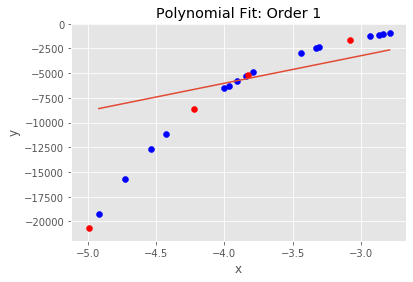

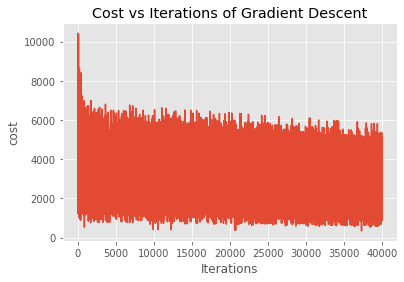

Training Cost: [13959.88815917 10402.57815917  7391.12815917  5872.45815917
  1924.37046667  1797.96046667  1603.50675958  1594.97619542
  1638.84244542  2380.36136167  2780.81184083  2858.52184083
  4009.39184083  4139.65184083  4202.33184083  4298.66184083]
Testing Cost: [14579.49434333  2604.35401167  1777.83183667  4467.86565667]
Noise: [2.36322958e+08 1.93852251e+08 1.08386410e+08 5.58165729e+07
 3.61854353e+07 1.39461741e+07 4.85313659e+06 4.36256901e+06
 3.78091676e+06 3.67732722e+06 3.70595329e+06 3.91521818e+06
 9.81414606e+06 1.23492002e+07 1.28136252e+07 1.80432063e+07
 2.11056058e+07 2.22110049e+07 2.27550069e+07 2.36063760e+07]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:2
1316.47 + -3923.25x^1 + -1533.32x^2
For mini-batch size: 5


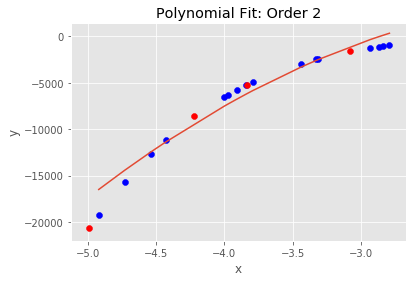

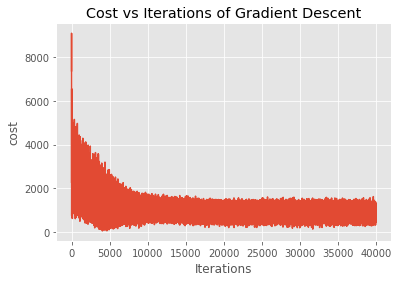

Training Cost: [13165.32718162  9712.23183914  7299.61913132  6361.1220721
  4308.11247939  4276.50997939  4276.93228963  4342.49103963
  4386.35728963  4680.56284227  4817.03811371  4855.89311371
  5431.32811371  5496.45811371  5527.79811371  5575.96311371]
Testing Cost: [12179.37350197  4856.11486628  5333.80000659  7113.04500659]
Noise: [2.29329582e+08 1.90121639e+08 1.12593387e+08 6.67431364e+07
 5.05006769e+07 3.38292038e+07 2.94489251e+07 2.95224863e+07
 3.00181056e+07 3.10847900e+07 3.12736044e+07 3.21057272e+07
 4.23964793e+07 4.59728803e+07 4.66107032e+07 5.35510795e+07
 5.74706729e+07 5.88667270e+07 5.95505898e+07 6.06169045e+07]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:3
-296.67 + 106.33x^1 + 926.17x^2 + 319.59x^3
For mini-batch size: 5


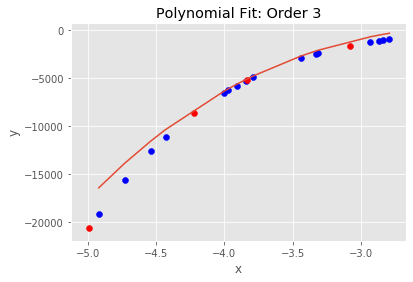

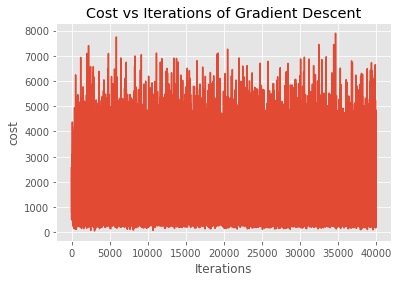

Training Cost: [13634.30495524 10176.78653103  7697.55181775  6616.29730639
  4217.95897458  4101.99295005  3961.92645972  3879.65913193
  3864.41328406  4095.35220274  4182.68703318  4202.11453318
  4711.03624178  4776.16624178  4807.50624178  4855.67124178]
Testing Cost: [12684.91594403  5058.21618144  4873.72423289  6592.3643979 ]
Noise: [2.40943252e+08 2.00342407e+08 1.19425527e+08 7.07066253e+07
 5.30175090e+07 3.39690977e+07 2.75769003e+07 2.74096299e+07
 2.74453524e+07 2.80124365e+07 2.81328650e+07 2.86990842e+07
 3.71149275e+07 4.02467682e+07 4.08105661e+07 4.70205887e+07
 5.05742384e+07 5.18462093e+07 5.24703643e+07 5.34449167e+07]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:4
-27.87 + 43.57x^1 + -27.49x^2 + -89.09x^3 + -123.60x^4
For mini-batch size: 5


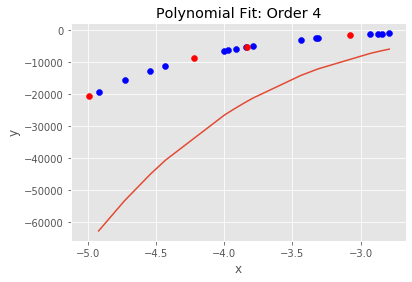

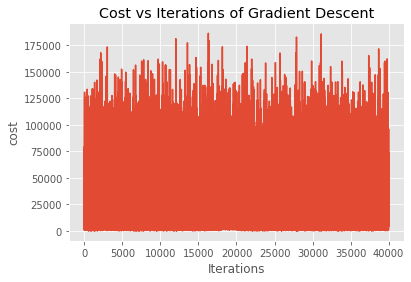

Training Cost: [13654.73300649 14099.39675649 14667.30790968 15321.62841397
 17733.56703893 17935.64260929 18373.96060365 18898.43060365
 19249.36060365 21217.60060365 21684.29060365 21762.00060365
 22912.87060365 23043.13060365 23105.81060365 23202.14060365]
Testing Cost: [17893.19654152 24067.75340681 27511.69340681 31070.18340681]
Noise: [3.63645927e+08 3.80961086e+08 4.40941176e+08 5.11498969e+08
 5.53960922e+08 6.33744091e+08 7.11006189e+08 7.20852545e+08
 7.40010483e+08 7.61350632e+08 7.64314500e+08 7.75936820e+08
 8.62310179e+08 8.83926551e+08 8.87568265e+08 9.24145930e+08
 9.42915284e+08 9.49346558e+08 9.52453325e+08 9.57243290e+08]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:5
6.80 + -27.47x^1 + 88.68x^2 + -229.69x^3 + 395.43x^4 + 200.86x^5
For mini-batch size: 5


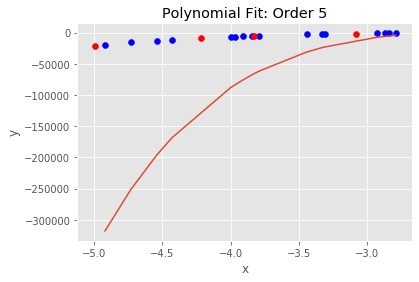

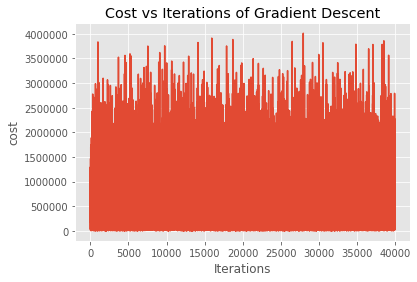

Training Cost: [75712.50191518 77491.15691518 78996.88191518 79756.21691518
 82194.7806958  82352.7931958  82685.40789552 83086.0547521
 83393.1185021  85276.2618518  85742.9518518  85820.6618518
 86971.5318518  87101.7918518  87164.4718518  87260.8018518 ]
Testing Cost: [120537.35696243 128463.17695402 131907.11695402 135465.60695402]
Noise: [1.64384939e+10 1.66667401e+10 1.72398694e+10 1.77448350e+10
 1.80063682e+10 1.84460976e+10 1.88280301e+10 1.88743463e+10
 1.89631476e+10 1.90601437e+10 1.90734634e+10 1.91253522e+10
 1.94956482e+10 1.95845855e+10 1.95994371e+10 1.97466142e+10
 1.98207994e+10 1.98460210e+10 1.98581694e+10 1.98768552e+10]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:6
-9.67 + 18.30x^1 + -19.71x^2 + -46.74x^3 + 393.51x^4 + -1339.84x^5 + 309.84x^6
For mini-batch size: 5


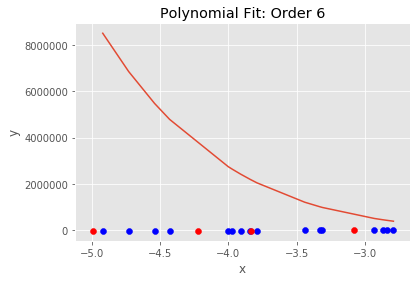

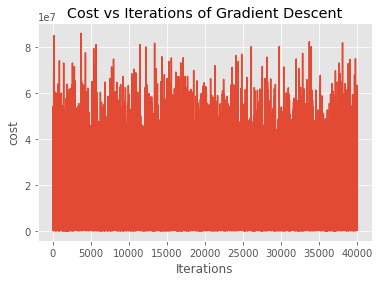

Training Cost: [2686561.71166306 2683004.40166306 2679992.95166306 2678474.28166306
 2673866.95166306 2673614.13166306 2673131.34166306 2672606.87166306
 2672255.94166306 2670287.70166306 2669821.01166306 2669743.30166306
 2668592.43166306 2668462.17166306 2668399.49166306 2668303.16166306]
Testing Cost: [3943251.94100925 3931207.01100925 3927763.07100925 3924204.58100925]
Noise: [1.55374744e+13 1.55288813e+13 1.55079940e+13 1.54903316e+13
 1.54814313e+13 1.54668177e+13 1.54544580e+13 1.54529791e+13
 1.54501554e+13 1.54470884e+13 1.54466686e+13 1.54450365e+13
 1.54335328e+13 1.54308063e+13 1.54303524e+13 1.54258742e+13
 1.54236308e+13 1.54228702e+13 1.54225042e+13 1.54219418e+13]
mean_absolute_error
Calculating w by gradient descent
Polynomial Order:7
8.40 + -19.48x^1 + 40.87x^2 + -71.41x^3 + 70.86x^4 + 207.38x^5 + -2225.55x^6 + 15809.48x^7
For mini-batch size: 5


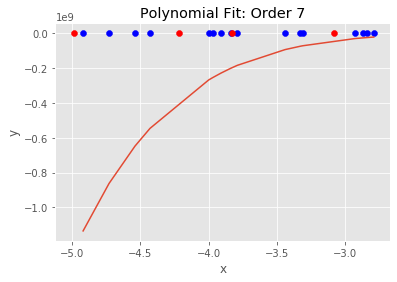

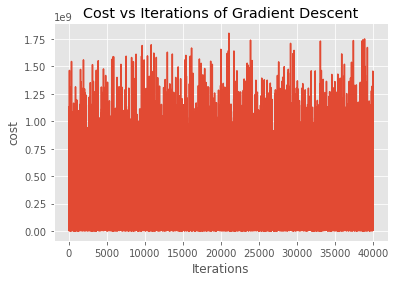

Training Cost: [2.92220212e+08 2.92223769e+08 2.92226781e+08 2.92228299e+08
 2.92232907e+08 2.92233160e+08 2.92233642e+08 2.92234167e+08
 2.92234518e+08 2.92236486e+08 2.92236953e+08 2.92237030e+08
 2.92238181e+08 2.92238312e+08 2.92238374e+08 2.92238471e+08]
Testing Cost: [4.71054639e+08 4.71066684e+08 4.71070128e+08 4.71073686e+08]
Noise: [2.40063142e+17 2.40064101e+17 2.40066434e+17 2.40068410e+17
 2.40069406e+17 2.40071043e+17 2.40072428e+17 2.40072594e+17
 2.40072911e+17 2.40073255e+17 2.40073302e+17 2.40073485e+17
 2.40074776e+17 2.40075083e+17 2.40075134e+17 2.40075637e+17
 2.40075889e+17 2.40075974e+17 2.40076015e+17 2.40076078e+17]


In [19]:
for i in range(1,8):
    main_f(i,1,20,5,10000,10**-5, 1,1)